In [ ]:
# %%HTML 
# <script>
#     function luc21893_refresh_cell(cell) {
#         if( cell.luc21893 ) return;
#         cell.luc21893 = true;
#         console.debug('New code cell found...' );
        
#         var div = document.createElement('DIV');            
#         cell.parentNode.insertBefore( div, cell.nextSibling );
#         div.style.textAlign = 'right';
#         var a = document.createElement('A');
#         div.appendChild(a);
#         a.href='#'
#         a.luc21893 = cell;
#         a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

#         cell.style.visibility='hidden';
#         cell.style.position='absolute';
#         a.innerHTML = '[show code]';        
                
#     }
#     function luc21893_refresh() {                
#         if( document.querySelector('.code_cell .input') == null ) {            
#             // it apeears that I am in a exported html
#             // hide this code
#             var codeCells = document.querySelectorAll('.jp-InputArea')
#             codeCells[0].style.visibility = 'hidden';
#             codeCells[0].style.position = 'absolute';                        
#             for( var i = 1; i < codeCells.length; i++ ) {
#                 luc21893_refresh_cell(codeCells[i].parentNode)
#             }
#             window.onload = luc21893_refresh;
#         }                 
#         else {
#             // it apperas that I am in a jupyter editor
#             var codeCells = document.querySelectorAll('.code_cell .input')
#             for( var i = 0; i < codeCells.length; i++ ) {
#                 luc21893_refresh_cell(codeCells[i])
#             }            
#             window.setTimeout( luc21893_refresh, 1000 )
#         }        
#     }
    
#     function luc21893_toggle(a) {
#         if( a.luc21893.style.visibility=='hidden' ) {
#             a.luc21893.style.visibility='visible';        
#             a.luc21893.style.position='';
#             a.innerHTML = '[hide code]';
#         }
#         else {
#             a.luc21893.style.visibility='hidden';        
#             a.luc21893.style.position='absolute';
#             a.innerHTML = '[show code]';
#         }
#     }
    
#     luc21893_refresh()
# </script>

# Assignment 2 - Geopandas

Create a map that visualizes the preferences of cities/municipalities between Jollibee and Mcdonalds in 'Metropolitan Manila'. Your map should distinctly show:
1. The locations of the Jollibee and Mcdonalds Establishments
1. The "preference" between the two
1. The bottom two cities in terms of number or restaurants/population

In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-nkpg9ds7 because the default path (/home/jgacal/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [3]:
df_try = gpd.read_postgis("""
SELECT p.name, p.way, g.name_2, g.geom
FROM ph_point p
JOIN gadm.ph g ON st_within(p.way,g.geom)
WHERE g.name_1 = 'Metropolitan Manila'

""", conn, geom_col = 'way')
df_try.dropna(inplace=True)
df_try

,name,way,name_2,geom
1,Martirez del '96,POINT (121.06568 14.53973),Pateros,0106000020E610000001000000010300000001000000A3...
2,TK,POINT (121.06733 14.53969),Pateros,0106000020E610000001000000010300000001000000A3...
3,Motolite,POINT (121.06740 14.54007),Pateros,0106000020E610000001000000010300000001000000A3...
4,1896 Revolution,POINT (121.06742 14.54012),Pateros,0106000020E610000001000000010300000001000000A3...
5,Southern Rizal Institute,POINT (121.06861 14.53961),Pateros,0106000020E610000001000000010300000001000000A3...
...,...,...,...,...
41103,Shanelly pisonet,POINT (121.01061 14.73347),Valenzuela,0106000020E610000001000000010300000002000000DD...
41107,Paraiso Village,POINT (121.01373 14.73587),Valenzuela,0106000020E610000001000000010300000002000000DD...
41108,Noah Street,POINT (121.01334 14.73666),Valenzuela,0106000020E610000001000000010300000002000000DD...
41109,Deparo High School,POINT (121.01191 14.73954),Valenzuela,0106000020E610000001000000010300000002000000DD...


In [5]:
#Lets query our gadm map first and store it as our ph_shp
ph_shp = gpd.read_postgis('''
SELECT *
FROM gadm.ph
''', con = conn, geom_col = 'geom')
ph_shp
mm_shp = ph_shp[ph_shp['name_1']=='Metropolitan Manila']

## Locations of Each Mcdonald's Store and Jollibee Store in Metro Manila

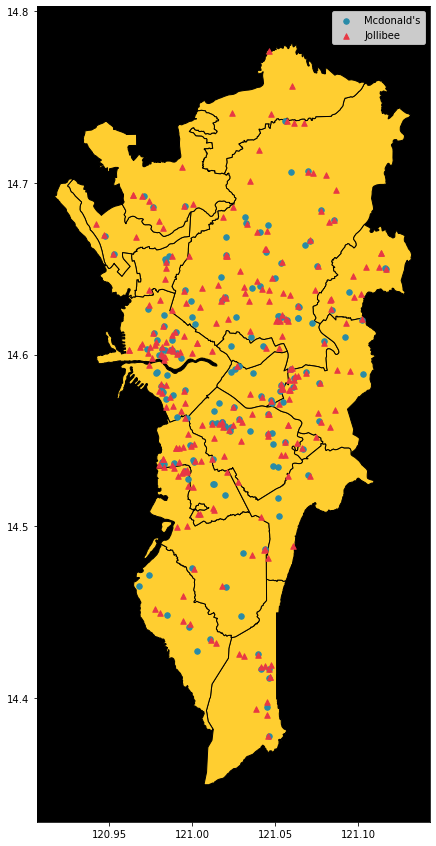

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor('black')
# df_mcdo = df_fastfood[(df_fastfood['name']=="Mcdonald's")]
# df_jollibee = df_fastfood[(df_fastfood['name']=='Jollibee')]

df_mcdo = gpd.GeoDataFrame(df_try[df_try.name.str.lower().str.contains('mcdo.*')], geometry='way')
df_jollibee = gpd.GeoDataFrame(df_try[df_try.name.str.lower().str.contains('jolli.*')], geometry='way')


mm_shp.plot(ax=ax, color='#FFCE30', edgecolor='black')

df_mcdo.plot(ax=ax, markersize=30, color='#288BA8', label="Mcdonald's")
df_jollibee.plot(marker='^', ax=ax, markersize=30, color='#E83845', label='Jollibee')
plt.legend()
plt.show()

## Preference for Jollibee and Mcdonald's Stores

In [7]:
jm_counts = [df_try[df_try.name.str.lower().str.contains('jolli.*')].groupby('name_2')['name'].count(),
 df_try[df_try.name.str.lower().str.contains('mcdo.*')].groupby('name_2')['name'].count()]

df_jm_density = pd.DataFrame(jm_counts, index=['jollibee', 'mcdo']).T
df_jm_density['j-m ratio'] = df_jm_density['jollibee'] / (df_jm_density['jollibee'] + df_jm_density['mcdo'])
# df_jm_density = df_jm_density.reset_index()
df_jm_density = pd.concat([df_jm_density, mm_shp.dissolve('name_2')['geom']], axis=1).drop(['Navotas'])
df_jm_density.rename(columns={0:'geom'}, inplace=True)
df_jm_density = gpd.GeoDataFrame(df_jm_density, geometry='geom')
df_jm_density

,jollibee,mcdo,j-m ratio,geom
name_2,,,,
Kalookan City,9.0,3.0,0.750000,"MULTIPOLYGON (((120.98495 14.63705, 120.98466 ..."
Las Piñas,7.0,6.0,0.538462,"MULTIPOLYGON (((120.99380 14.41080, 120.99392 ..."
Makati City,25.0,21.0,0.543478,"POLYGON ((121.06578 14.53872, 121.06594 14.538..."
Malabon,4.0,2.0,0.666667,"POLYGON ((120.95800 14.65938, 120.95796 14.658..."
Mandaluyong,6.0,8.0,0.428571,"POLYGON ((121.05405 14.57747, 121.05408 14.577..."
Manila,42.0,27.0,0.608696,"POLYGON ((120.99142 14.56218, 120.98849 14.561..."
Marikina,11.0,4.0,0.733333,"POLYGON ((121.07346 14.61962, 121.07432 14.620..."
Muntinlupa,13.0,6.0,0.684211,"POLYGON ((121.02339 14.35760, 121.02313 14.357..."
Parañaque,15.0,7.0,0.681818,"MULTIPOLYGON (((121.00110 14.45587, 121.00110 ..."


In [9]:
df_jm_density['coords'] = df_jm_density['geom'].apply(lambda x: x.representative_point().coords[:])
df_jm_density['coords'] = [coords[0] for coords in df_jm_density['coords']]
df_jm_density

,jollibee,mcdo,j-m ratio,geom,coords
name_2,,,,,
Kalookan City,9.0,3.0,0.750000,"MULTIPOLYGON (((120.98495 14.63705, 120.98466 ...","(121.04615732805766, 14.743260385)"
Las Piñas,7.0,6.0,0.538462,"MULTIPOLYGON (((120.99380 14.41080, 120.99392 ...","(121.00125255161754, 14.43518543)"
Makati City,25.0,21.0,0.543478,"POLYGON ((121.06578 14.53872, 121.06594 14.538...","(121.03603962590697, 14.547920705)"
Malabon,4.0,2.0,0.666667,"POLYGON ((120.95800 14.65938, 120.95796 14.658...","(120.95678936284554, 14.67388058)"
Mandaluyong,6.0,8.0,0.428571,"POLYGON ((121.05405 14.57747, 121.05408 14.577...","(121.03753064862448, 14.585350510000001)"
Manila,42.0,27.0,0.608696,"POLYGON ((120.99142 14.56218, 120.98849 14.561...","(120.98355502586293, 14.59954214)"
Marikina,11.0,4.0,0.733333,"POLYGON ((121.07346 14.61962, 121.07432 14.620...","(121.10702067839902, 14.646957395000001)"
Muntinlupa,13.0,6.0,0.684211,"POLYGON ((121.02339 14.35760, 121.02313 14.357...","(121.03220290537041, 14.410797595)"
Parañaque,15.0,7.0,0.681818,"MULTIPOLYGON (((121.00110 14.45587, 121.00110 ...","(121.01697562501957, 14.48537064)"


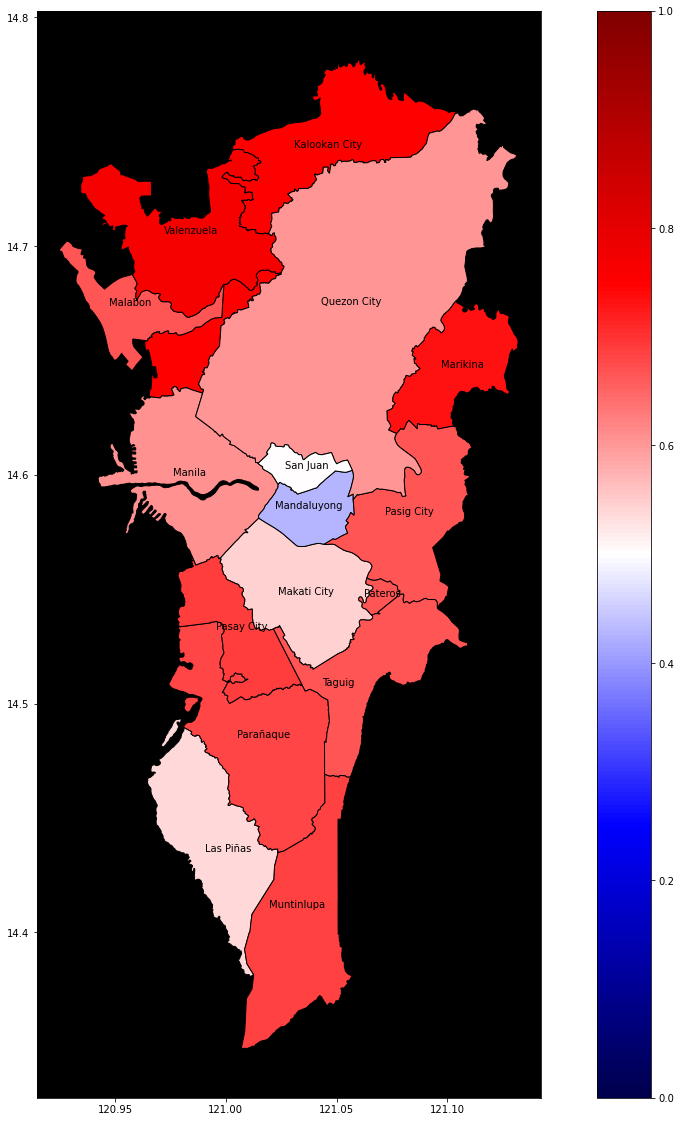

In [23]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes()
ax.set_facecolor('black')
df_jm_density.plot(column='j-m ratio', cmap='seismic', legend=True, vmin=0, vmax=1, ax=ax, linewidth=1, edgecolor='black')

for idx, row in df_jm_density.iterrows():
    plt.annotate(text=idx, xy=row['coords'],
                 horizontalalignment='center')

plt.show()

In [24]:
df_jm_density['jollibee'].sum()

255.0

In [25]:
df_jm_density['mcdo'].sum()

153.0

There are a total of 255 Jollibee stores and 153 Mcdonald's stores in the metro. The heat map above shows the proportion of jollibees there are to mcdonald's stores in each city. The more red a city is, the more jollibees there are in the area, while the bluer the city is, the more mcdonald's stores there are in the area. It is clearly seen in the plot that almost all cities in the metro have more jollibees than mcdonald's stores. However, Mandaluyong and San Juan city had more or equal number of Mcdonald's stores than jollibee stores.

For Mcdonald's there is a lot of opportunity for market penetration especially given that Metro Manila is the most densly populated area in the country. Meanwhile, Jollibee should continue its dominance on the market but remain vigilant with the possibility that Mcdonald's may try to expand in Jollibee-dominated areas. 

## The bottom two cities in terms of number or restaurants/population

In [27]:
fin_pop = pd.read_csv('financial_pop.csv')
mm_data = mm_shp.merge(fin_pop, left_on = ['name_1','name_2'],
                       right_on = ['shp_province','shp_municipality'])
mm_data

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,973,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.13_1,Pateros,None,None,...,56.080847,201.599229,163.300161,38.299068,0.000000,1.482140,4.546140,62.811989,Metropolitan Manila,Pateros
1,974,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.14_1,Quezon City,None,None,...,12833.213830,18526.608000,9782.849320,8743.758684,0.000000,4860.912186,4860.912186,12761.512750,Metropolitan Manila,Quezon City
2,965,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.5_1,Mandaluyong,"Mandaluyong, City of",None,...,4851.641755,5862.396531,2960.364965,2902.031566,5.599664,102.726892,267.430004,3491.561763,Metropolitan Manila,Mandaluyong
3,966,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.6_1,Manila,"City of Manila|Manila, City of",None,...,8009.830859,11975.244480,7523.296121,4451.948361,266.429514,2287.001749,2347.412734,5701.646022,Metropolitan Manila,Manila
4,967,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.7_1,Marikina,"Marikina, City of",None,...,1008.797613,2366.331933,1606.966038,759.365894,338.653456,336.088870,422.780337,1347.965746,Metropolitan Manila,Marikina
5,968,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.8_1,Muntinlupa,"Muntinlupa, City of",None,...,2546.918961,4315.507771,2990.154537,1325.353234,0.000000,957.577746,1089.389596,995.435257,Metropolitan Manila,Muntinlupa
6,961,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,None,...,2078.233727,4718.102455,2885.275622,1832.826833,372.406907,307.132984,548.347680,671.177751,Metropolitan Manila,Kalookan City
7,962,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.2_1,Las Piñas,"Las Piñas, City of",None,...,948.154753,2107.391432,1743.842711,363.548721,535.127365,126.072295,453.219048,1524.694001,Metropolitan Manila,Las Piñas
8,963,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,"Makati, City of",None,...,11338.122110,13575.480700,7444.964790,6130.515909,0.000000,71.159205,479.640478,11126.810600,Metropolitan Manila,Makati City
9,964,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.4_1,Malabon,None,None,...,406.027365,1254.476844,945.121196,309.355647,0.000000,189.269629,265.790960,465.910035,Metropolitan Manila,Malabon


In [32]:
mm_rest = gpd.read_postgis('''
SELECT p.name, p.way
FROM ph_point AS p
JOIN gadm.ph as g ON st_within(p.way, g.geom)
WHERE p.amenity = 'restaurant' AND g.name_1 = 'Metropolitan Manila'
'''
, con = conn, geom_col = 'way'
)
mm_rest

,name,way
0,Jing ragas tapsi,POINT (121.06719 14.54281)
1,Aling Tessie's Lugawan,POINT (121.06617 14.54531)
2,Dos Hermanas,POINT (121.06697 14.54478)
3,RnR Burgers,POINT (121.06811 14.54563)
4,ACC,POINT (121.06819 14.54561)
...,...,...
2872,Lugawan ni Uring's,POINT (121.02190 14.69425)
2873,Food to go,POINT (120.99004 14.70633)
2874,V-Migz - Meycauayan,POINT (120.95946 14.72231)
2875,EatMoto Mini Banchetto,POINT (120.95361 14.73069)


In [38]:
mm_other_rest = gpd.read_postgis(f'''
SELECT p.name, p.way
FROM ph_point AS p
JOIN gadm.ph as g ON st_within(p.way, g.geom)
WHERE p.name 
IN (
    SELECT p2.name
    FROM ph_point AS p2
    JOIN gadm.ph as g2 ON st_within(p2.way, g2.geom)
    WHERE p2.amenity = 'restaurant' AND g2.name_1 = 'Metropolitan Manila'
) 

AND g.name_1 = 'Metropolitan Manila'
'''
, con = conn, geom_col = 'way'
)
mm_other_rest

,name,way
0,Ikay's Seafood Sutukil,POINT (121.10277 14.64125)
1,Wai Ying Dimsum,POINT (120.99326 14.56609)
2,Single Origin,POINT (121.02145 14.55200)
3,Single Origin,POINT (121.04933 14.55157)
4,Partners Pares,POINT (121.01821 14.63394)
...,...,...
3775,Dulcelin Gourmet,POINT (121.07486 14.64937)
3776,Bastille Bistro,POINT (121.03604 14.45722)
3777,Silantro,POINT (121.07480 14.64927)
3778,Silantro,POINT (121.02847 14.42476)


In [43]:
dict_ = {}
for idx, data in mm_other_rest.iterrows():
    for idx2, data2 in mm_shp[['name_2', 'geom']].iterrows():
        
        if data['way'].within(data2['geom']):
            dict_[idx] = data2['name_2']

In [52]:
mm_rest_final = pd.concat([mm_other_rest, pd.DataFrame(dict_, index=['location']).T], axis=1)
mm_rest_final

,name,way,location
0,Ikay's Seafood Sutukil,POINT (121.10277 14.64125),Marikina
1,Wai Ying Dimsum,POINT (120.99326 14.56609),Manila
2,Single Origin,POINT (121.02145 14.55200),Makati City
3,Single Origin,POINT (121.04933 14.55157),Makati City
4,Partners Pares,POINT (121.01821 14.63394),Quezon City
...,...,...,...
3775,Dulcelin Gourmet,POINT (121.07486 14.64937),Quezon City
3776,Bastille Bistro,POINT (121.03604 14.45722),Parañaque
3777,Silantro,POINT (121.07480 14.64927),Quezon City
3778,Silantro,POINT (121.02847 14.42476),Muntinlupa


In [53]:
mm_rest_final.groupby('location')['name'].count()

location
Kalookan City     37
Las Piñas        142
Makati City      816
Malabon           22
Mandaluyong      119
Manila           390
Marikina         139
Muntinlupa       216
Navotas            1
Parañaque        222
Pasay City       216
Pasig City       260
Pateros           15
Quezon City      959
San Juan         137
Taguig            29
Valenzuela        60
Name: name, dtype: int64

In [87]:
mm_rest_density = pd.concat([mm_rest_final.groupby('location')['name'].count(), mm_data[['name_2', 'pop']].set_index('name_2')], axis=1)
mm_rest_density['density'] = mm_rest_density['name']/mm_rest_density['pop']
mm_rest_density['log_density'] = mm_rest_density['density'].apply(np.log)
mm_rest_density['scaled_density'] = (mm_rest_density['log_density'] - mm_rest_density['log_density'].min()) / (mm_rest_density['log_density'].max() - mm_rest_density['log_density'].min())

mm_rest_density

,name,pop,density,log_density,scaled_density
Kalookan City,37,1583978.0,0.000023,-10.664532,0.300968
Las Piñas,142,588894.0,0.000241,-8.330174,0.699579
Makati City,816,582602.0,0.001401,-6.570845,1.000000
Malabon,22,365525.0,0.000060,-9.718048,0.462588
Mandaluyong,119,386276.0,0.000308,-8.085184,0.741414
Manila,390,1780148.0,0.000219,-8.426060,0.683206
Marikina,139,450741.0,0.000308,-8.084174,0.741586
Muntinlupa,216,504509.0,0.000428,-7.756063,0.797614
Navotas,1,249463.0,0.000004,-12.427066,0.000000
Parañaque,222,665822.0,0.000333,-8.006100,0.754918


In [88]:
df_final = gpd.GeoDataFrame(pd.concat([mm_rest_density, mm_shp[['name_2', 'geom']].set_index('name_2')], axis=1), geometry='geom')

df_final['coords'] = df_final['geom'].apply(lambda x: x.representative_point().coords[:])
df_final['coords'] = [coords[0] for coords in df_final['coords']]
df_final
df_final

,name,pop,density,log_density,scaled_density,geom,coords
Kalookan City,37,1583978.0,0.000023,-10.664532,0.300968,"MULTIPOLYGON (((121.02068 14.71426, 121.02071 ...","(121.04615732805766, 14.743260385)"
Las Piñas,142,588894.0,0.000241,-8.330174,0.699579,"MULTIPOLYGON (((120.97972 14.49306, 120.98000 ...","(121.00125255161754, 14.43518543)"
Makati City,816,582602.0,0.001401,-6.570845,1.000000,"MULTIPOLYGON (((121.06578 14.53872, 121.06594 ...","(121.03603962590697, 14.547920705)"
Malabon,22,365525.0,0.000060,-9.718048,0.462588,"MULTIPOLYGON (((120.95800 14.65938, 120.95796 ...","(120.95678936284554, 14.67388058)"
Mandaluyong,119,386276.0,0.000308,-8.085184,0.741414,"MULTIPOLYGON (((121.05405 14.57747, 121.05408 ...","(121.03753064862448, 14.585350510000001)"
Manila,390,1780148.0,0.000219,-8.426060,0.683206,"MULTIPOLYGON (((120.99142 14.56218, 120.98849 ...","(120.98355502586293, 14.59954214)"
Marikina,139,450741.0,0.000308,-8.084174,0.741586,"MULTIPOLYGON (((121.07346 14.61962, 121.07432 ...","(121.10702067839902, 14.646957395000001)"
Muntinlupa,216,504509.0,0.000428,-7.756063,0.797614,"MULTIPOLYGON (((121.02339 14.35760, 121.02313 ...","(121.03220290537041, 14.410797595)"
Navotas,1,249463.0,0.000004,-12.427066,0.000000,"MULTIPOLYGON (((120.96163 14.63365, 120.96139 ...","(120.93938480947224, 14.6676054)"
Parañaque,222,665822.0,0.000333,-8.006100,0.754918,"MULTIPOLYGON (((121.00084 14.50921, 121.00104 ...","(121.01697562501957, 14.48537064)"


In [107]:
bottom2 = df_final['scaled_density'].sort_values().argsort().head(2).index
bottom2

Index(['Navotas', 'Kalookan City'], dtype='object')

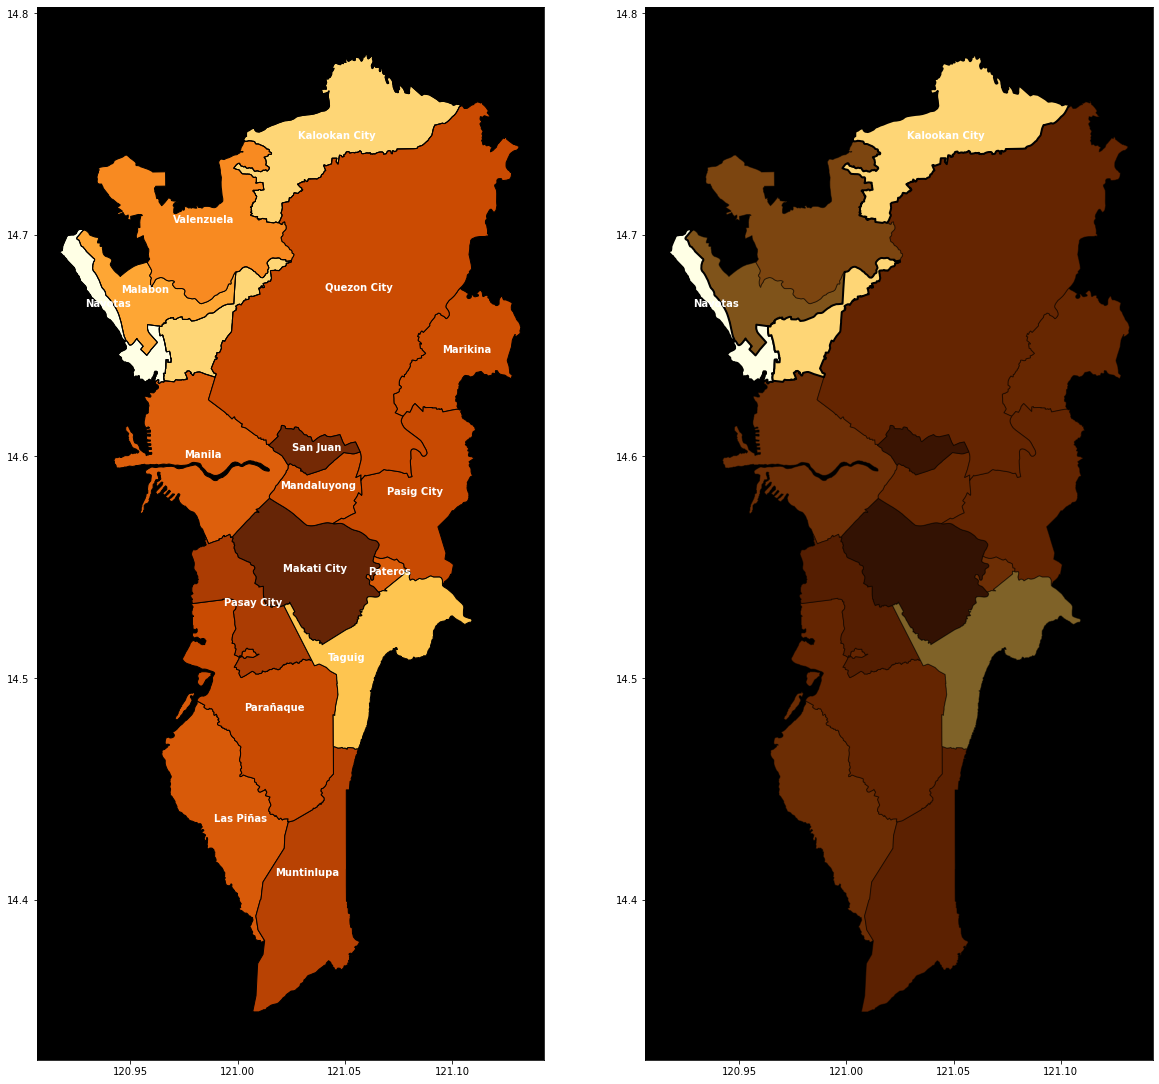

In [142]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].set_facecolor('black')
df_final.plot(column='scaled_density', cmap='YlOrBr', ax=ax[0], edgecolor='black', linewidth=1, alpha=1)

df_final.loc[bottom2,:].plot(ax=ax[0], edgecolor='black', linewidth=1, facecolor='none')

for idx, row in df_final.iterrows():
    ax[0].annotate(text=idx, xy=row['coords'],
                 horizontalalignment='center', color='white', weight='bold')
    
    
ax[1].set_facecolor('black')
df_final.plot(column='scaled_density', cmap='YlOrBr', ax=ax[1], edgecolor='black', linewidth=1, alpha=0.5)

df_final.loc[bottom2,:].plot(column='scaled_density', ax=ax[1], edgecolor='black', linewidth=2, cmap='YlOrBr', vmin=0, vmax=1)

for idx, row in df_final.loc[bottom2,:].iterrows():
    ax[1].annotate(text=idx, xy=row['coords'],
                 horizontalalignment='center', color='white', weight='bold')


The plot above shows a heat map of the proportions of restaurants with respect to the population of a city. The most dense areas are Makati City and San Juan City, while the 2 least dense cities are Navotas and Kalookan. Restaurant chains would be able to leverage on this information by trying to expand to less dense areas especially Navotas and Kalookan. 